# Home Assignment No. 2 - part one

To solve this task, you will write a lot of code to try several deep learning approaches.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [pytorch](https://pytorch.org/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, the whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `pytorch` and `torchvision` libraries instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed`, i.e., to use `torch.manual_seed(...)` and `np.random.seed(...)`.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Remember to use **GPU** computations in `pytorch`. For this, you have to write `model.cuda()`, `tensor.cuda()` to put your model/tensor to GPU. If you do not want to have an easy life, you may compute everything on **CPU** (default).

* If you have **multiple** GPUs available, you may call `torch.cuda.set_device(DEVICE_ID)` to specify the particular  GPU device to be used. Also, you are allowed to use `torch.nn.DataParallel(...)` to compute on multiple GPUs but a **single Google Colab GPU is enough for each task**.


## Task 1. Toy Deep Learning. (3 points)

-  **(1 pt.)** Activation functions; **(subtask 1.1)**
-  **(2 pt.)** MNIST classification.  **(subtask 1.2)**



### Subproblem 1.1  Activation functions. 
Plot the following [activation functions](https://pytorch.org/docs/master/nn.html#non-linear-activation-functions) using their PyTorch implementation and their derivatives using [autograd](https://pytorch.org/docs/stable/autograd.html) functionality `grad()`:
   
**1.1.1) Plot `ReLU`, `ELU` ($\alpha = 1$), `Softplus` ($\beta = 1$) and `Sign`, `Sigmoid`, `Softsign`, `Tanh`.**


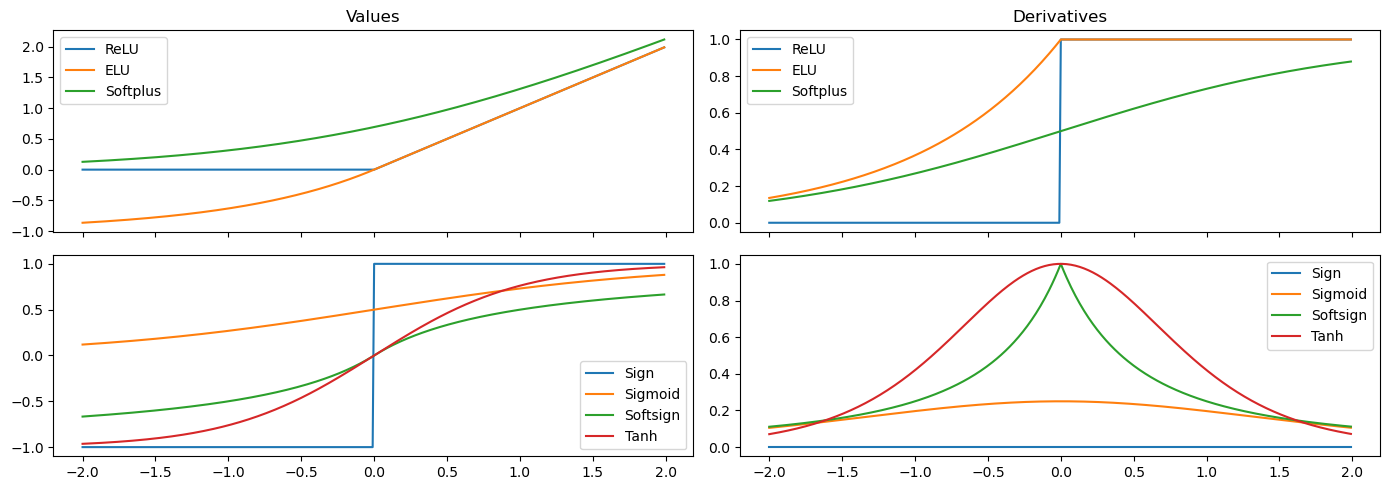

In [1]:
%matplotlib inline
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch
from autograd import grad

x = torch.arange(-2, 2, .01, requires_grad=True)
x_np = x.detach().numpy()
x.sum().backward() # to create x.grad

f, axes = plt.subplots(2, 2, sharex=True, figsize=(14, 5))
axes[0, 0].set_title('Values')
axes[0, 1].set_title('Derivatives')

names = []

for i, function_set in (0, (('ReLU', F.relu), ('ELU', F.elu), ('Softplus', F.softplus))), \
                       (1, (('Sign', torch.sign), ('Sigmoid', torch.sigmoid), ('Softsign', F.softsign), ('Tanh', torch.tanh))):
    for function_name, activation in function_set:
        ### BEGIN Solution (do not delete this comment)
            
            x = torch.arange(-2, 2, .01, requires_grad=True)
            y = activation(x)
            axes[i, 0].plot(x_np, y.detach().numpy(), label=function_name)

            y.sum().backward()
            x.grad
            axes[i, 1].plot(x_np, x.grad.detach().numpy(), label=function_name)

        ### END Solution (do not delete this comment)

    axes[i, 0].legend()
    axes[i, 1].legend()
plt.tight_layout()
plt.show()

**4.1.2) Which of these functions may be, and which - definitely, are a poor choise as an activation function in a neural network? Why? Do not forget that output of the current layer servers as an input for the following one. Imagine a situation where we have many layers, what happens with the activation values?**







**Your text answer (do not delete this comment)**:
*   ReLU **It's the most popular function that is used in the convolutional neural networks and deep learning. Here, the main issue is that all negative values will be 0 and model won't train properly.**
*   ELU **In comparison to ReLU, ELU has negative inputs.**
*   Softplus **It's just a smooth approximation to the ReLU that limits the output to be always positive.**
*   Sign **It's the simplest activation function used in nn.**
*   Sigmoid **This is a very common activation function to use as the last layer of binary classifiers. It allows to consider model predictions like probabilities.**
*   Tanh **It's the most popular function that maps strongly negative inputs to negative values.**

### Task 1.2 MNIST classification. 

At one of the seminars we have discussed an MLP (Multilayer perceptron) with one hidden layer, logistic activation functions and softmax. In this task, you will need to:

1. Implement the MLP modules, including the Softmax cross entropy between `logits` and `labels` using numpy.

2.  Train your numpy realization of MLP to classify MNIST from `sklearn.datasets()`. The required accuracy on validation is `> 90%`.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
# fetch the dataset.
digits, targets = load_digits(return_X_y=True)
digits = digits.astype(np.float32) / 255

digits_train, digits_test, targets_train, targets_test = train_test_split(digits, targets, random_state=0)

train_size = digits_train.shape[0]
test_size = digits_test.shape[0]

input_size = 8*8
classes_n = 10

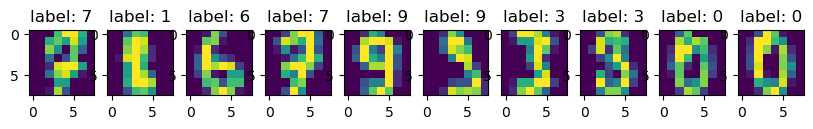

In [6]:
N = 10

sample_idx = np.random.choice(1797, N, replace=False)
digits_sample = digits[sample_idx]
targets_sample = targets[sample_idx]
f, ax  = plt.subplots(1,10, figsize=(10, 5))

for i in range(N):
    ax[i].imshow(digits_sample[i].reshape(8,8))
    ax[i].set_title('label: '+str(targets_sample[i]))


A short recap on what we are going to achieve here.
<br>
1. Forward pass:
$$
h_1 = X\theta_1+\beta_1
$$

$$
O_1 = sig(h_1)
$$

$$
h_2 = O_1\theta_2+\beta_2
$$
$$
O_2 = softmax(h_2)
$$
$$
Loss = CrossEntropy(O_2, true \space labels)
$$

2. Compute gradients: 

To update weights first we need to compute loss gradients with respect to $\theta_1$ and $\theta_2$ and then update both $\theta$ and $\beta$.

$$
\frac{ \partial{loss} }{\partial{\theta_2}} = \frac{ \partial{loss} }{\partial{O_2}}\frac{ \partial{O_2} }{\partial{h_2}}\frac{ \partial{h_2} }{\partial{\theta_2}}
$$
Note, that $\frac{ \partial{h_2} }{\partial{\theta_2}}=O_1$, so we can cache this value during forward pass to speed up our computation.
$$
\frac{ \partial{loss} }{\partial{\theta_1}} = \frac{ \partial{loss} }{\partial{O_2}}\frac{ \partial{O_2} }{\partial{h_2}}\frac{ \partial{h_2} }{\partial{O_1}}\frac{ \partial{O_1} }{\partial{h_1}}\frac{ \partial{h_1} }{\partial{\theta_1}}
$$
Note, that $\frac{ \partial{h_1} }{\partial{\theta_1}}=X$.

Since we are using sigmoid avtivation function here and
$$
\frac{ \partial{sig} }{\partial{h}} = sig(h)(1 - sig(h))
$$
It also makes sense to cache sig(h) during forward pass.

3. Update weights:

$\theta:= \theta -  \frac{ \partial{loss} }{\partial{\theta}}\alpha$, where $\alpha$ is some learning rate.

Note, it was not shown here how to update and compute $\beta$ but you can do it!

**1.2.1) Implement the MLP with backprop**

Here you should implement an MLP class and its constituents including forward and backward propagation methods.

In [7]:

class Linear:
    def __init__(self, input_size, output_size):
        # Trainable parameters of the layer and their gradients
        self.thetas = np.random.randn(input_size, output_size) # the weight matrix of the layer (W)
        self.thetas_grads = np.empty_like(self.thetas) # gradient w.r.t. the weight matrix of the layer
        self.bias = np.random.randn(output_size) # bias terms of the layer (b)
        self.bias_grads = np.empty_like(self.bias) # gradient w.r.t. bias terms of the linear layer

    def forward(self, x): 
        # keep x for backward computation
        self.x = x 
        output = np.matmul(x, self.thetas) + self.bias
        return output
    
    def backward(self, output_grad, learning_rate):
        """
        Calculate and return gradient of the loss w.r.t. the input of linear layer given the input x and the gradient 
        w.r.t output of linear layer. You should also calculate and update gradients of layer parameters.
        :param x: np.array, input tensor for linear layer;
        :param output_grad: np.array, grad tensor w.r.t output of linear layer;
        :return: np.array, grad w.r.t input of linear layer
        """
        
        ### BEGIN Solution (do not delete this comment)
        
        self.thetas_grads = self.x.T @ output_grad
        self.bias_grads = np.sum(output_grad, axis=0)
        self.step(learning_rate)
        
        input_grad = output_grad @ self.thetas.T
         
        ### END Solution (do not delete this comment!)
        
        return input_grad

    def step(self, learning_rate):
        self.thetas -= self.thetas_grads * learning_rate
        self.bias -= self.bias_grads * learning_rate

class LogisticActivation:
    def __init__(self):
        # the layer has no parameters
        pass 
        
    def sig(self, x):
        return 1/(1 + np.exp(-x))

    def forward(self, x):
        # keep o for backward computation
        self.o = self.sig(x)
        return self.o 


    def backward(self,  output_grad, learning_rate=None):
        """
        Calculate and return the gradient of the loss w.r.t. the input
        of logistic non-linearity (given input x and the gradient 
        w.r.t output of logistic non-linearity).
        
        :param x: np.array, input tensor for logistic non-linearity;
        :param output_grad: np.array, grad tensor w.r.t output of logistic non-linearity;
        :return: np.array, grad w.r.t input of logistic non-linearity
        
        """
        
        ### BEGIN Solution (do not delete this comment!)

        input_grad = output_grad * self.o * (1 - self.o)

        ### END Solution (do not delete this comment!)
        
        return input_grad


class MLP:
    def __init__(self, input_size, hidden_layer_size, output_size):
        self.linear1 = Linear(input_size, hidden_layer_size)
        self.activation1 = LogisticActivation()
        self.linear2 = Linear(hidden_layer_size, output_size)
        
    def forward(self, x):
        h1 = self.linear1.forward(x)
        h1a = self.activation1.forward(h1)
        out = self.linear2.forward(h1a)
        return out

    def backward(self, output_grad, learning_rate):
        """
        Calculate and return the gradient of the loss w.r.t. the input of MLP given the input and the gradient 
        w.r.t output of MLP. You should also update gradients of paramerters of MLP layers.
        Hint - you should chain backward operations of modules you have already implemented. You may also
        need to calculate intermediate forward results.
        
        :param x: np.array, input tensor for MLP;
        :param output_grad: np.array, grad tensor w.r.t output of MLP;
        :return: np.array, grad w.r.t input of MLP
        """
 
        ### BEGIN Solution (do not delete this comment!)

        h1 = self.linear2.backward(output_grad, learning_rate)
        h1a = self.activation1.backward(h1, learning_rate)
        out = self.linear1.backward(h1a, learning_rate)

        ### END Solution (do not delete this comment!)
        

        return  out


In [8]:
def softmax_crossentropy_with_logits(logits, reference_answers):
    
    ### BEGIN Solution (do not delete this comment!)
    
    soft_max_val = np.exp(logits[:, reference_answers]) / np.exp(logits).sum()
    soft_max_val = soft_max_val[0][0]
    
    loss = -np.log(soft_max_val)

    ### END Solution (do not delete this comment!)
    
    return loss

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    
    ### BEGIN Solution (do not delete this comment!)

    grad = np.zeros_like(logits)
    grad[range(len(grad)), reference_answers] = 1
      
    grad = np.exp(logits) / np.exp(logits).sum(axis=1) - grad
      
    ### END Solution (do not delete this comment!)

    return grad

In [9]:
np.random.seed(42)

mlp = MLP(input_size=input_size, hidden_layer_size=100, output_size=classes_n)

epochs_n = 100
learning_curve = [0] * epochs_n
test_curve = [0] * epochs_n

x_train = digits_train
x_test = digits_test
y_train = targets_train
y_test = targets_test

learning_rate = 1e-2

for epoch in range(epochs_n):
    
    y_pred = []

    for sample_i in range(train_size):
        x = x_train[sample_i].reshape((1, -1))
        target = np.array([y_train[sample_i]])
        logits = mlp.forward(x)

        ### BEGIN Solution (do not delete this comment!)
                
        loss = softmax_crossentropy_with_logits(logits, target) # Сompute the loss
        
        grad = grad_softmax_crossentropy_with_logits(logits, target) # Сompute the gradients w.r.t. the input of softmax layer
        
        mlp.backward(grad, learning_rate) # perform backward pass 
        
        # update the weights
        mlp.linear1.thetas -= mlp.linear1.thetas_grads * learning_rate
        mlp.linear1.bias -= mlp.linear1.bias_grads * learning_rate
        mlp.linear2.thetas -= mlp.linear2.thetas_grads * learning_rate
        mlp.linear2.bias -= mlp.linear2.bias_grads * learning_rate

        ### END Solution (do not delete this comment!)

        y_pred.extend(logits.argmax(1))

    if epoch % 10 == 0:
        
        y_pred_test = []

        for sample_i in range(test_size):
            x = x_test[sample_i].reshape((1, -1))
            target = np.array([y_test[sample_i]])
            
            logits = mlp.forward(x)
            y_pred_test.extend(logits.argmax(1))

        print('Starting epoch {}'.format(epoch), \
              ', Loss : {:.3}'.format(loss), \
              ', Accuracy on train: {:.3}'.format(accuracy_score(y_train, y_pred)), \
              ', Accuracy on test: {:.3}'.format(accuracy_score(y_test, y_pred_test)) )

Starting epoch 0 , Loss : 2.75 , Accuracy on train: 0.117 , Accuracy on test: 0.113
Starting epoch 10 , Loss : 1.58 , Accuracy on train: 0.788 , Accuracy on test: 0.733
Starting epoch 20 , Loss : 0.742 , Accuracy on train: 0.884 , Accuracy on test: 0.873
Starting epoch 30 , Loss : 0.39 , Accuracy on train: 0.91 , Accuracy on test: 0.902
Starting epoch 40 , Loss : 0.238 , Accuracy on train: 0.929 , Accuracy on test: 0.931
Starting epoch 50 , Loss : 0.16 , Accuracy on train: 0.936 , Accuracy on test: 0.938
Starting epoch 60 , Loss : 0.116 , Accuracy on train: 0.945 , Accuracy on test: 0.942
Starting epoch 70 , Loss : 0.0879 , Accuracy on train: 0.95 , Accuracy on test: 0.947
Starting epoch 80 , Loss : 0.0692 , Accuracy on train: 0.953 , Accuracy on test: 0.949
Starting epoch 90 , Loss : 0.0561 , Accuracy on train: 0.958 , Accuracy on test: 0.951


**1.2.2) Print the confusion matrix between your predictions and true values.**

In [10]:
# BEGIN Solution (do not delete this comment!)

confusion_matrix(y_test, y_pred_test)

# END Solution (do not delete this comment!)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 0,  1, 42,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  4,  1,  0,  0,  1,  0,  1, 41,  0],
       [ 0,  0,  0,  4,  0,  2,  0,  0,  1, 40]])

## Task 2. CIFAR-10 Classification (10 points)
**From now on we will be using pytorch for all the tasks.**

We will create a 10-class classifier on the popular [CIFAR-10](https://pytorch.org/vision/stable/datasets.html#cifar) dataset.

1. **(1 pt.)**  Load the dataset. Prepare dataloaders (train, test). Visualize images. (**Subproblem 2.1**)

2. **(2 pt.)**  Prepare the training procedure. Train a simple linear classifier `clf_lr`. (**Subproblem 2.2**)

3. **(2 pt.)**  Define, train and evaluate a sequential fully-connected classifier `clf_mlp`. (**Subproblem 2.3**)

4. **(3 pt.)**  Define, train and evaluate a convolutional + fully-connected classifier `clf_cnn`. (**Subproblem 2.4**)

5. **(2 pt.)**  Define, train and evaluate a deep neural network classifier `clf` from [torchvision.models](https://pytorch.org/vision/stable/models.html). (**Subproblem 2.5**)

To get points for subtasks 3-5, it is **mandatory** to succesfully complete preparation subtasks 1, 2.

In [11]:
### BEGIN Solution (do not delete this comment!)

# torch.manual_seed(0)
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
torch.manual_seed(42)

import warnings
warnings.filterwarnings("ignore")

### END Solution (do not delete this comment!)

### Subproblems 2.1. Dataloaders.

<img width=350 src="https://ak.picdn.net/shutterstock/videos/1039407446/thumb/1.jpg">

**2.1.1) Here you have to load CIFAR-10 dataset. For this, you have to**
1. Create two composite [transform](https://pytorch.org/vision/stable/transforms.html#compositions-of-transforms) operations (`train_transform`, `test_transform`) to augment/normalize the data (random crops, rotations, etc.):
- On the train set, you are free to compose any transforms you want. It is not mandatory to use any transforms (except for `ToTensor`), but without proper data augmentation you will probably struggle to train classifier in the following tasks.
- On the test set, we may use only `Normalization` and `ToTensor`. If you use normalization, make sure it is the same on both train and test parts.
2. Load the train and test parts (`train_set`, `test_set`) of the [CIFAR-10 dataset](https://pytorch.org/vision/stable/datasets.html#cifar) which use the transforms that you prepared.
3. Prepare train and test [dataloaders](https://pytorch.org/docs/stable/data.html) (`train_loader`, `test_loader`) which load the respective datasets. Use some batch size $\in[8, 128]$.

In [12]:
### BEGIN Solution (do not delete this comment)

batch_size = 32 # number of images in one batch
mean = [ 0.485, 0.456, 0.406 ]
std = [ 0.229, 0.224, 0.225 ]

train_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                      transforms.RandomPerspective(.1),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean, std)
                                      ])

test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize(mean, std)])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True, num_workers=8)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transform)

test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                         shuffle=False, num_workers=8)


### END Solution (do not delete this comment)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print('Train size', len(train_set))
print('Test size', len(test_set))

Files already downloaded and verified
Files already downloaded and verified
Train size 50000
Test size 10000


**2.1.2) Now write a function** which takes a dataloader and plots a **random batch** of images with their **true labels**. If the pre-processing in your dataloaders contains normalization, you **must** perform inverse normalization in order to make the colors look natural. You also have to remove the ticks/labels of axes from each subplot and assign a title to each subplot based on the image's class. Visualizing images helps to check that the preprocessing you do is meaningful.

In [13]:
def plot_random_images(loader):
    # BEGIN Solution (do not delete this comment!)
    
    inv_normalize = transforms.Normalize(mean= [-m/s for m, s in zip(mean, std)],
                                         std= [1/s for s in std])
                 
    fig, axes = plt.subplots(figsize = (20, 20), ncols = 11)

    images, labels = next(iter(loader))
    for n, (img, label) in enumerate(zip(images, labels)):
        img = inv_normalize(img)
        axes[n].imshow(img.permute(1,2,0))
        axes[n].set_title(classes[label.item()], fontsize=22)
        axes[n].axis("off")
        
        if n == 10:
            break

    # END Solution (do not delete this comment!)

**2.1.3) Plot random train and test images.**

Train (augmented) images.


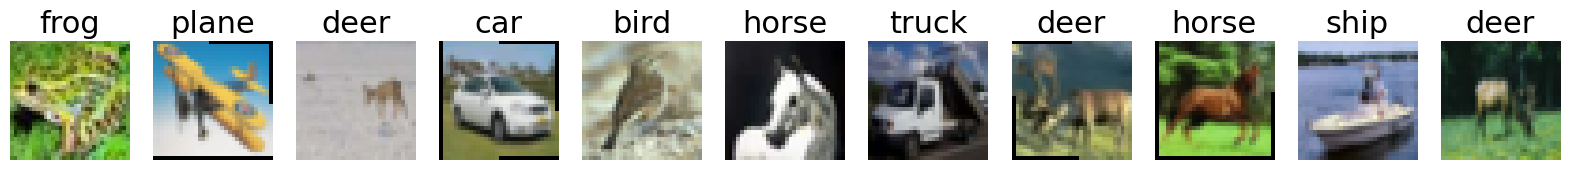

In [14]:
print('Train (augmented) images.')
plot_random_images(train_loader)

Test images (no augmentation).


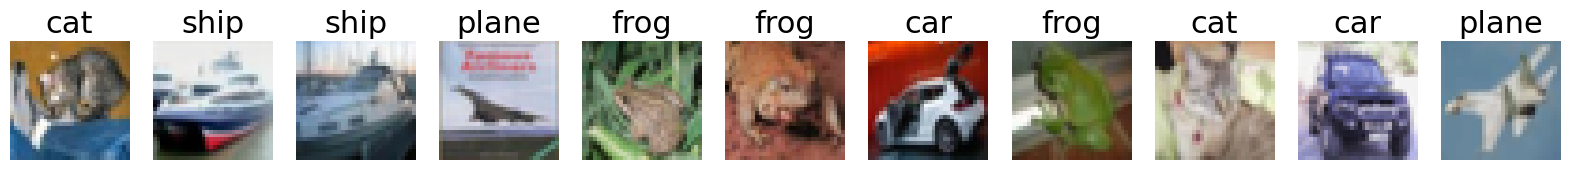

In [15]:
print('Test images (no augmentation).')
plot_random_images(test_loader)

### Subtask 2.2. Training procedure + linear classification ($\geq$38%)
**2.2.1) Now we are ready to write the code for training & evaluation. You have to prepare 2 following procedures:**
1. `epoch_train` has to perform 1 training epoch. It should iterate the given `loader`. For each batch it should compute the loss of the `clf` model by `criterion` and perform the gradient step by using the model optimizer `opt`. The function should return **2 values** -- average loss on batches during training and average accuracy of prediction.
2. `epoch_test` has to perform 1 evaluation epoch. It should do the same as `epoch_train` but without performing optimization of `clf` model.

At the beginning of `epoch_train` and `epoch_test` it is necessary to call `clf.train(True)` and `clf.eval()` respectively. This will change the behaviour of dropout/batchnorm layers to the one required during the procedure (training/evaluation). For more details, see this [post](https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch).

In [16]:
def epoch_train(loader, clf, criterion, opt):
    # BEGIN Solution (do not delete this comment!)
    
    clf.train(True)
    loss_ls, accuracy_ls = [], []
    for clf_input, target in loader:
        
        opt.zero_grad()
        clf_input, target = clf_input.to(device), target.to(device) # send data to device

        clf_output = clf(clf_input) # calculate outputs
        
        loss = criterion(clf_output, target) # calculate loss

        loss.backward()
        opt.step()

        loss_ls.append(loss.item()*clf_input.shape[0])
        
        y_pred = torch.argmax(clf_output, dim=1)
        accuracy = (y_pred == target).sum().item()
        accuracy_ls.append(accuracy)
        
    return sum(loss_ls)/len(loader.dataset), sum(accuracy_ls)/len(loader.dataset)


def epoch_test(loader, clf, criterion):
    # BEGIN Solution (do not delete this comment!)

    clf.eval()
    loss_ls, accuracy_ls = [], []
    for clf_input, target in loader:

        clf_input, target = clf_input.to(device), target.to(device) # send data to device

        clf_output = clf(clf_input) # calculate outputs

        loss = criterion(clf_output, target) # calculate loss

        loss_ls.append(loss.item()*clf_input.shape[0])

        y_pred = torch.argmax(clf_output, dim=1)
        accuracy = (y_pred == target).sum().item()
        accuracy_ls.append(accuracy)
        
    return sum(loss_ls)/len(loader.dataset), sum(accuracy_ls)/len(loader.dataset)

    # END Solution (do not delete this comment!)

# The function which you are going to use for model training
def train(train_loader, test_loader, clf, criterion, opt, n_epochs=50):
    for epoch in tqdm(range(n_epochs)):
        train_loss, train_acc = epoch_train(train_loader, clf, criterion, opt)
        test_loss, test_acc = epoch_test(test_loader, clf, criterion)

        print(f'[Epoch {epoch + 1}] train loss: {train_loss:.4f}; train acc: {train_acc:.4f}; ' + 
              f'test loss: {test_loss:.4f}; test acc: {test_acc:.4f}')

Below we define a simple linear classifier which can be used to test the code above.

In [17]:
class LINEAR(nn.Module):
    def __init__(self, num_classes=10):
        super(LINEAR, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 32 * 3, num_classes)
        )
        
    def forward(self, x):

        return self.layers(x)

clf_lr = LINEAR(num_classes=10).cuda()
print('Number of weights:', np.sum([np.prod(p.shape) for p in clf_lr.parameters()]))

Number of weights: 30730


**2.2.2) Define the optimizer (use [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)) and the training criterion. As the training criterion for classification, please use the [CrossEntropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).**

In [18]:
# BEGIN Solution (do not delete this comment!)

clf_lr = clf_lr.to(device)
opt = torch.optim.SGD(clf_lr.parameters(), lr=1e-3, momentum = 0.1)
criterion = nn.CrossEntropyLoss()

# END Solution (do not delete this comment!)

Now train your linear classifier. It is mandatory to achieve the **final test accuracy $\geq$38%**. If you do not achieve this accuracy, try changing optimizer parameters (learning rate, momentum, weight decay), train data augmentation (subtask 8.1), batch size, number of training epochs.

In [19]:
train(train_loader, test_loader, clf_lr, criterion, opt, n_epochs=20)

  5%|▌         | 1/20 [00:13<04:17, 13.54s/it]

[Epoch 1] train loss: 1.8974; train acc: 0.3415; test loss: 1.8364; test acc: 0.3664


 10%|█         | 2/20 [00:26<03:58, 13.25s/it]

[Epoch 2] train loss: 1.8082; train acc: 0.3793; test loss: 1.7980; test acc: 0.3845


 15%|█▌        | 3/20 [00:39<03:45, 13.24s/it]

[Epoch 3] train loss: 1.7830; train acc: 0.3900; test loss: 1.7882; test acc: 0.3846


 20%|██        | 4/20 [00:53<03:32, 13.26s/it]

[Epoch 4] train loss: 1.7695; train acc: 0.3943; test loss: 1.7807; test acc: 0.3875


 25%|██▌       | 5/20 [01:04<03:07, 12.49s/it]

[Epoch 5] train loss: 1.7591; train acc: 0.3977; test loss: 1.7663; test acc: 0.3955


 30%|███       | 6/20 [01:17<02:59, 12.79s/it]

[Epoch 6] train loss: 1.7515; train acc: 0.4005; test loss: 1.7605; test acc: 0.3972


 35%|███▌      | 7/20 [01:31<02:48, 13.00s/it]

[Epoch 7] train loss: 1.7433; train acc: 0.4046; test loss: 1.7561; test acc: 0.3956


 40%|████      | 8/20 [01:44<02:37, 13.11s/it]

[Epoch 8] train loss: 1.7402; train acc: 0.4054; test loss: 1.7619; test acc: 0.3910


 45%|████▌     | 9/20 [01:56<02:19, 12.67s/it]

[Epoch 9] train loss: 1.7372; train acc: 0.4083; test loss: 1.7501; test acc: 0.3958


 50%|█████     | 10/20 [02:09<02:08, 12.86s/it]

[Epoch 10] train loss: 1.7306; train acc: 0.4080; test loss: 1.7450; test acc: 0.3998


 55%|█████▌    | 11/20 [02:22<01:56, 12.98s/it]

[Epoch 11] train loss: 1.7287; train acc: 0.4088; test loss: 1.7515; test acc: 0.3951


 60%|██████    | 12/20 [02:36<01:44, 13.12s/it]

[Epoch 12] train loss: 1.7256; train acc: 0.4104; test loss: 1.7425; test acc: 0.4003


 65%|██████▌   | 13/20 [02:49<01:31, 13.10s/it]

[Epoch 13] train loss: 1.7228; train acc: 0.4107; test loss: 1.7403; test acc: 0.3990


 70%|███████   | 14/20 [03:01<01:17, 12.94s/it]

[Epoch 14] train loss: 1.7202; train acc: 0.4127; test loss: 1.7396; test acc: 0.4021


 75%|███████▌  | 15/20 [03:14<01:05, 13.02s/it]

[Epoch 15] train loss: 1.7174; train acc: 0.4128; test loss: 1.7380; test acc: 0.4044


 80%|████████  | 16/20 [03:28<00:52, 13.11s/it]

[Epoch 16] train loss: 1.7165; train acc: 0.4145; test loss: 1.7404; test acc: 0.4008


 85%|████████▌ | 17/20 [03:41<00:39, 13.19s/it]

[Epoch 17] train loss: 1.7135; train acc: 0.4136; test loss: 1.7366; test acc: 0.4044


 90%|█████████ | 18/20 [03:52<00:25, 12.59s/it]

[Epoch 18] train loss: 1.7125; train acc: 0.4142; test loss: 1.7332; test acc: 0.3977


 95%|█████████▌| 19/20 [04:05<00:12, 12.76s/it]

[Epoch 19] train loss: 1.7101; train acc: 0.4157; test loss: 1.7336; test acc: 0.4007


100%|██████████| 20/20 [04:19<00:00, 12.96s/it]

[Epoch 20] train loss: 1.7102; train acc: 0.4138; test loss: 1.7418; test acc: 0.3985


**2.2.3)** Explain which steps you have conducted (which architectures, optimizers, data augmentations, etc. you have tested) to obtain the final result. What were the most important changes in **hyperparameters** which helped to achieve the high score?

**Your text answer:** 

In this task, I used the next transforms in augmentation: **RandomHorizontalFlip()**, **RandomPerspective(.1)**, **Normalize(mean, std)**. Also, I tried to add **RandomRotation(15)**, but the accuracy was becoming lower. I noticed that the lower value of learning_rate in SGD optimizer, the better accuracy and the same thing was for momentum in SGD. Here, I reduced a momentum and got a relatively high score.

### Subtask 2.3. Fully-connected classifier  ($\geq$63%)
**2.3.1)** Linear classifiers are doomed to provide poor performance on most image datasets. We make a step further and define a **multilayer perceptron** to classify CIFAR-10 images. You have to build a **sequential fully-connected network** satisfying the following requirements:
1. $\geq 2$ hidden fully-connected (linear) layers;
2. The network has ReLU activations;
3. There is $\geq 1$ Dropout layer in network;
4. There is $\geq 1$ BatchNorm1d layer layer in network;

**A toy image** of a fully-connected neural network.

<img width=450 src="https://www.researchgate.net/profile/Vikas-Ramachandra-2/publication/323467511/figure/fig3/AS:599172503834624@1519865265479/Figure-A-general-fully-connected-DNN-for-classification.png">

Note your network's input shape is `BATCH_SIZE x 3 x 32 x 32`, so you have to reshape the input tensor before feeding it to fully-connected layers. This can be done manually during `.forward()` or you may use `Flatten()` layer for this.

In [20]:
class MLP(nn.Module):
    def __init__(self, num_classes=10):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            # BEGIN Solution (do not delete this comment!)

            nn.Flatten(),

            nn.Linear(3*32*32, 32*64), nn.ReLU(),nn.BatchNorm1d(32*64), nn.Dropout(p=0.2),

            nn.Linear(32*64, 32*32), nn.BatchNorm1d(32*32), nn.ReLU(), nn.Dropout(p=0.2),

            nn.Linear(32*32, 32*16), nn.BatchNorm1d(32*16), nn.ReLU(),

            nn.Linear(32*16, 32*2), nn.BatchNorm1d(32*2), nn.ReLU(),

            nn.Linear(32*2, num_classes)
            
            # END Solution (do not delete this comment!)
        )
        
    def forward(self, x):
        return self.layers(x)
    
clf_mlp = MLP(num_classes=10).cuda()
print('Number of weights:', np.sum([np.prod(p.shape) for p in clf_mlp.parameters()]))

# Check that the output size of the network is BATCH_SIZE x NUM_CLASSES
X = next(iter(train_loader))[0].cuda()
with torch.no_grad():
    clf_X = clf_mlp(X)
    assert len(clf_X) == len(X)
    assert clf_X.shape[1] == 10

Number of weights: 8957258


**2.3.2) Now define the optimizer, criterion and train the network.** To obtain the points for this task, you must achieve **final test accuracy $\geq$63%**.

If you struggle to achieve this accuracy, try changing the architecture (stack more/less layers, make layers bigger/smaller, add more/less dropout, batchnorm layers), optimizer parameters, train data augmentation (subtask 5.1), batch size, number of training epochs, etc. SGD optimizer might not perform really well, so consider using [more advanced optimizers](https://pytorch.org/docs/stable/optim.html), e.g., `Adam`, `Adamax`, etc. Do not be afraid to stack more layers: it is ok if your net has millions of weights.

In [21]:
# BEGIN Solution (do not delete this comment!)

from torch.optim.lr_scheduler import ReduceLROnPlateau, ExponentialLR, MultiStepLR

batch_size = 128 # number of images in one batch
mean = [ 0.485, 0.456, 0.406 ]
std = [ 0.229, 0.224, 0.225 ]

train_transform = transforms.Compose([
                                      transforms.RandomHorizontalFlip(p=0.2),
                                      transforms.RandomVerticalFlip(p=0.1),
                                      transforms.RandomPerspective(.1),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean, std)
                                      ])


test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize(mean, std)])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True, num_workers=8)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transform)

test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                         shuffle=False, num_workers=8)


clf_mlp = clf_mlp.to(device)
opt = torch.optim.Adamax(clf_mlp.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()
scheduler = ReduceLROnPlateau(opt, 'max')

# END Solution (do not delete this comment!)

train(train_loader, test_loader, clf_mlp, criterion, opt, n_epochs=200)

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 1/200 [00:07<25:36,  7.72s/it]

[Epoch 1] train loss: 1.8617; train acc: 0.3597; test loss: 1.6456; test acc: 0.4496


  1%|          | 2/200 [00:16<26:42,  8.09s/it]

[Epoch 2] train loss: 1.6555; train acc: 0.4360; test loss: 1.5154; test acc: 0.4823


  2%|▏         | 3/200 [00:24<26:59,  8.22s/it]

[Epoch 3] train loss: 1.5502; train acc: 0.4676; test loss: 1.4324; test acc: 0.5093


  2%|▏         | 4/200 [00:32<27:03,  8.28s/it]

[Epoch 4] train loss: 1.4785; train acc: 0.4898; test loss: 1.3820; test acc: 0.5232


  2%|▎         | 5/200 [00:41<27:03,  8.33s/it]

[Epoch 5] train loss: 1.4238; train acc: 0.5086; test loss: 1.3346; test acc: 0.5363


  3%|▎         | 6/200 [00:49<26:55,  8.33s/it]

[Epoch 6] train loss: 1.3765; train acc: 0.5224; test loss: 1.3002; test acc: 0.5455


  4%|▎         | 7/200 [00:57<26:50,  8.34s/it]

[Epoch 7] train loss: 1.3370; train acc: 0.5362; test loss: 1.2771; test acc: 0.5533


  4%|▍         | 8/200 [01:06<26:45,  8.36s/it]

[Epoch 8] train loss: 1.3030; train acc: 0.5469; test loss: 1.2483; test acc: 0.5616


  4%|▍         | 9/200 [01:13<25:29,  8.01s/it]

[Epoch 9] train loss: 1.2716; train acc: 0.5578; test loss: 1.2415; test acc: 0.5646


  5%|▌         | 10/200 [01:21<25:35,  8.08s/it]

[Epoch 10] train loss: 1.2436; train acc: 0.5676; test loss: 1.2295; test acc: 0.5602


  6%|▌         | 11/200 [01:30<25:45,  8.18s/it]

[Epoch 11] train loss: 1.2200; train acc: 0.5761; test loss: 1.2049; test acc: 0.5747


  6%|▌         | 12/200 [01:38<25:48,  8.24s/it]

[Epoch 12] train loss: 1.2026; train acc: 0.5796; test loss: 1.1999; test acc: 0.5781


  6%|▋         | 13/200 [01:46<25:46,  8.27s/it]

[Epoch 13] train loss: 1.1698; train acc: 0.5918; test loss: 1.1940; test acc: 0.5758


  7%|▋         | 14/200 [01:55<25:40,  8.28s/it]

[Epoch 14] train loss: 1.1531; train acc: 0.5979; test loss: 1.1870; test acc: 0.5776


  8%|▊         | 15/200 [02:03<25:36,  8.31s/it]

[Epoch 15] train loss: 1.1346; train acc: 0.6051; test loss: 1.1752; test acc: 0.5838


  8%|▊         | 16/200 [02:11<25:31,  8.32s/it]

[Epoch 16] train loss: 1.1200; train acc: 0.6099; test loss: 1.1775; test acc: 0.5804


  8%|▊         | 17/200 [02:19<24:20,  7.98s/it]

[Epoch 17] train loss: 1.1013; train acc: 0.6159; test loss: 1.1597; test acc: 0.5871


  9%|▉         | 18/200 [02:27<24:38,  8.13s/it]

[Epoch 18] train loss: 1.0861; train acc: 0.6216; test loss: 1.1649; test acc: 0.5880


 10%|▉         | 19/200 [02:35<24:41,  8.18s/it]

[Epoch 19] train loss: 1.0639; train acc: 0.6309; test loss: 1.1553; test acc: 0.5904


 10%|█         | 20/200 [02:44<24:40,  8.22s/it]

[Epoch 20] train loss: 1.0574; train acc: 0.6324; test loss: 1.1542; test acc: 0.5918


 10%|█         | 21/200 [02:52<24:42,  8.28s/it]

[Epoch 21] train loss: 1.0400; train acc: 0.6426; test loss: 1.1512; test acc: 0.5955


 11%|█         | 22/200 [03:00<24:37,  8.30s/it]

[Epoch 22] train loss: 1.0268; train acc: 0.6423; test loss: 1.1424; test acc: 0.5993


 12%|█▏        | 23/200 [03:09<24:27,  8.29s/it]

[Epoch 23] train loss: 1.0091; train acc: 0.6485; test loss: 1.1525; test acc: 0.5902


 12%|█▏        | 24/200 [03:17<24:19,  8.29s/it]

[Epoch 24] train loss: 0.9943; train acc: 0.6568; test loss: 1.1414; test acc: 0.5969


 12%|█▎        | 25/200 [03:25<23:46,  8.15s/it]

[Epoch 25] train loss: 0.9858; train acc: 0.6578; test loss: 1.1403; test acc: 0.5981


 13%|█▎        | 26/200 [03:33<23:24,  8.07s/it]

[Epoch 26] train loss: 0.9732; train acc: 0.6638; test loss: 1.1349; test acc: 0.5972


 14%|█▎        | 27/200 [03:41<23:31,  8.16s/it]

[Epoch 27] train loss: 0.9606; train acc: 0.6673; test loss: 1.1302; test acc: 0.5994


 14%|█▍        | 28/200 [03:49<23:32,  8.21s/it]

[Epoch 28] train loss: 0.9455; train acc: 0.6729; test loss: 1.1371; test acc: 0.5973


 14%|█▍        | 29/200 [03:58<23:33,  8.27s/it]

[Epoch 29] train loss: 0.9380; train acc: 0.6772; test loss: 1.1283; test acc: 0.6044


 15%|█▌        | 30/200 [04:06<23:29,  8.29s/it]

[Epoch 30] train loss: 0.9242; train acc: 0.6820; test loss: 1.1368; test acc: 0.5966


 16%|█▌        | 31/200 [04:14<23:20,  8.29s/it]

[Epoch 31] train loss: 0.9105; train acc: 0.6859; test loss: 1.1336; test acc: 0.6055


 16%|█▌        | 32/200 [04:23<23:17,  8.32s/it]

[Epoch 32] train loss: 0.9042; train acc: 0.6870; test loss: 1.1250; test acc: 0.6037


 16%|█▋        | 33/200 [04:31<23:10,  8.33s/it]

[Epoch 33] train loss: 0.8958; train acc: 0.6909; test loss: 1.1394; test acc: 0.6024


 17%|█▋        | 34/200 [04:38<22:09,  8.01s/it]

[Epoch 34] train loss: 0.8747; train acc: 0.6996; test loss: 1.1339; test acc: 0.6076


 18%|█▊        | 35/200 [04:47<22:17,  8.10s/it]

[Epoch 35] train loss: 0.8678; train acc: 0.7042; test loss: 1.1299; test acc: 0.6075


 18%|█▊        | 36/200 [04:55<22:20,  8.17s/it]

[Epoch 36] train loss: 0.8627; train acc: 0.7035; test loss: 1.1289; test acc: 0.6098


 18%|█▊        | 37/200 [05:04<22:22,  8.24s/it]

[Epoch 37] train loss: 0.8499; train acc: 0.7088; test loss: 1.1228; test acc: 0.6074


 19%|█▉        | 38/200 [05:12<22:17,  8.25s/it]

[Epoch 38] train loss: 0.8382; train acc: 0.7121; test loss: 1.1343; test acc: 0.6064


 20%|█▉        | 39/200 [05:20<22:16,  8.30s/it]

[Epoch 39] train loss: 0.8316; train acc: 0.7136; test loss: 1.1219; test acc: 0.6125


 20%|██        | 40/200 [05:29<22:09,  8.31s/it]

[Epoch 40] train loss: 0.8244; train acc: 0.7199; test loss: 1.1268; test acc: 0.6111


 20%|██        | 41/200 [05:37<22:05,  8.33s/it]

[Epoch 41] train loss: 0.8101; train acc: 0.7245; test loss: 1.1243; test acc: 0.6182


 21%|██        | 42/200 [05:44<21:06,  8.01s/it]

[Epoch 42] train loss: 0.8071; train acc: 0.7244; test loss: 1.1207; test acc: 0.6180


 22%|██▏       | 43/200 [05:53<21:11,  8.10s/it]

[Epoch 43] train loss: 0.7972; train acc: 0.7292; test loss: 1.1377; test acc: 0.6129


 22%|██▏       | 44/200 [06:01<21:13,  8.17s/it]

[Epoch 44] train loss: 0.7802; train acc: 0.7360; test loss: 1.1295; test acc: 0.6170


 22%|██▎       | 45/200 [06:09<21:14,  8.22s/it]

[Epoch 45] train loss: 0.7744; train acc: 0.7388; test loss: 1.1340; test acc: 0.6148


 23%|██▎       | 46/200 [06:18<21:14,  8.28s/it]

[Epoch 46] train loss: 0.7733; train acc: 0.7364; test loss: 1.1357; test acc: 0.6168


 24%|██▎       | 47/200 [06:26<21:07,  8.28s/it]

[Epoch 47] train loss: 0.7637; train acc: 0.7416; test loss: 1.1241; test acc: 0.6180


 24%|██▍       | 48/200 [06:34<21:00,  8.29s/it]

[Epoch 48] train loss: 0.7528; train acc: 0.7424; test loss: 1.1307; test acc: 0.6142


 24%|██▍       | 49/200 [06:43<20:55,  8.31s/it]

[Epoch 49] train loss: 0.7493; train acc: 0.7460; test loss: 1.1343; test acc: 0.6177


 25%|██▌       | 50/200 [06:50<20:20,  8.14s/it]

[Epoch 50] train loss: 0.7446; train acc: 0.7487; test loss: 1.1344; test acc: 0.6188


 26%|██▌       | 51/200 [06:58<19:58,  8.05s/it]

[Epoch 51] train loss: 0.7322; train acc: 0.7537; test loss: 1.1395; test acc: 0.6202


 26%|██▌       | 52/200 [07:06<19:59,  8.11s/it]

[Epoch 52] train loss: 0.7224; train acc: 0.7559; test loss: 1.1492; test acc: 0.6150


 26%|██▋       | 53/200 [07:15<20:02,  8.18s/it]

[Epoch 53] train loss: 0.7151; train acc: 0.7593; test loss: 1.1344; test acc: 0.6202


 27%|██▋       | 54/200 [07:23<20:04,  8.25s/it]

[Epoch 54] train loss: 0.7085; train acc: 0.7586; test loss: 1.1404; test acc: 0.6193


 28%|██▊       | 55/200 [07:32<20:02,  8.30s/it]

[Epoch 55] train loss: 0.7081; train acc: 0.7623; test loss: 1.1393; test acc: 0.6200


 28%|██▊       | 56/200 [07:40<19:55,  8.30s/it]

[Epoch 56] train loss: 0.7018; train acc: 0.7642; test loss: 1.1380; test acc: 0.6195


 28%|██▊       | 57/200 [07:48<19:48,  8.31s/it]

[Epoch 57] train loss: 0.6935; train acc: 0.7678; test loss: 1.1497; test acc: 0.6210


 29%|██▉       | 58/200 [07:57<19:46,  8.35s/it]

[Epoch 58] train loss: 0.6829; train acc: 0.7701; test loss: 1.1465; test acc: 0.6200


 30%|██▉       | 59/200 [08:04<18:53,  8.04s/it]

[Epoch 59] train loss: 0.6703; train acc: 0.7738; test loss: 1.1581; test acc: 0.6193


 30%|███       | 60/200 [08:12<18:58,  8.13s/it]

[Epoch 60] train loss: 0.6706; train acc: 0.7758; test loss: 1.1332; test acc: 0.6222


 30%|███       | 61/200 [08:21<19:02,  8.22s/it]

[Epoch 61] train loss: 0.6675; train acc: 0.7792; test loss: 1.1371; test acc: 0.6230


 31%|███       | 62/200 [08:29<18:55,  8.23s/it]

[Epoch 62] train loss: 0.6573; train acc: 0.7805; test loss: 1.1552; test acc: 0.6195


 32%|███▏      | 63/200 [08:37<18:52,  8.27s/it]

[Epoch 63] train loss: 0.6565; train acc: 0.7808; test loss: 1.1515; test acc: 0.6203


 32%|███▏      | 64/200 [08:46<18:44,  8.27s/it]

[Epoch 64] train loss: 0.6473; train acc: 0.7842; test loss: 1.1533; test acc: 0.6217


 32%|███▎      | 65/200 [08:54<18:38,  8.28s/it]

[Epoch 65] train loss: 0.6410; train acc: 0.7851; test loss: 1.1531; test acc: 0.6191


 33%|███▎      | 66/200 [09:02<18:33,  8.31s/it]

[Epoch 66] train loss: 0.6351; train acc: 0.7873; test loss: 1.1594; test acc: 0.6231


 34%|███▎      | 67/200 [09:09<17:39,  7.97s/it]

[Epoch 67] train loss: 0.6321; train acc: 0.7884; test loss: 1.1660; test acc: 0.6200


 34%|███▍      | 68/200 [09:18<17:48,  8.10s/it]

[Epoch 68] train loss: 0.6258; train acc: 0.7924; test loss: 1.1632; test acc: 0.6182


 34%|███▍      | 69/200 [09:26<17:51,  8.18s/it]

[Epoch 69] train loss: 0.6210; train acc: 0.7937; test loss: 1.1691; test acc: 0.6225


 35%|███▌      | 70/200 [09:35<17:51,  8.24s/it]

[Epoch 70] train loss: 0.6174; train acc: 0.7947; test loss: 1.1668; test acc: 0.6245


 36%|███▌      | 71/200 [09:43<17:49,  8.29s/it]

[Epoch 71] train loss: 0.6138; train acc: 0.7959; test loss: 1.1582; test acc: 0.6295


 36%|███▌      | 72/200 [09:51<17:43,  8.31s/it]

[Epoch 72] train loss: 0.6081; train acc: 0.7988; test loss: 1.1610; test acc: 0.6309


 36%|███▋      | 73/200 [10:00<17:38,  8.33s/it]

[Epoch 73] train loss: 0.5996; train acc: 0.8004; test loss: 1.1618; test acc: 0.6264


 37%|███▋      | 74/200 [10:08<17:29,  8.33s/it]

[Epoch 74] train loss: 0.5969; train acc: 0.8023; test loss: 1.1644; test acc: 0.6305


 38%|███▊      | 75/200 [10:16<17:00,  8.17s/it]

[Epoch 75] train loss: 0.5902; train acc: 0.8045; test loss: 1.1638; test acc: 0.6296


 38%|███▊      | 76/200 [10:24<16:43,  8.09s/it]

[Epoch 76] train loss: 0.5949; train acc: 0.8009; test loss: 1.1809; test acc: 0.6214


 38%|███▊      | 77/200 [10:32<16:43,  8.15s/it]

[Epoch 77] train loss: 0.5766; train acc: 0.8088; test loss: 1.1775; test acc: 0.6259


 39%|███▉      | 78/200 [10:40<16:43,  8.22s/it]

[Epoch 78] train loss: 0.5769; train acc: 0.8070; test loss: 1.1816; test acc: 0.6256


 40%|███▉      | 79/200 [10:49<16:37,  8.25s/it]

[Epoch 79] train loss: 0.5757; train acc: 0.8097; test loss: 1.1778; test acc: 0.6276


 40%|████      | 80/200 [10:57<16:33,  8.28s/it]

[Epoch 80] train loss: 0.5760; train acc: 0.8094; test loss: 1.1902; test acc: 0.6253


 40%|████      | 81/200 [11:05<16:28,  8.31s/it]

[Epoch 81] train loss: 0.5684; train acc: 0.8137; test loss: 1.1749; test acc: 0.6269


 41%|████      | 82/200 [11:14<16:21,  8.32s/it]

[Epoch 82] train loss: 0.5621; train acc: 0.8152; test loss: 1.1809; test acc: 0.6294


 42%|████▏     | 83/200 [11:22<16:13,  8.32s/it]

[Epoch 83] train loss: 0.5581; train acc: 0.8165; test loss: 1.1952; test acc: 0.6267


 42%|████▏     | 84/200 [11:30<15:39,  8.10s/it]

[Epoch 84] train loss: 0.5556; train acc: 0.8171; test loss: 1.1888; test acc: 0.6283


 42%|████▎     | 85/200 [11:38<15:41,  8.18s/it]

[Epoch 85] train loss: 0.5399; train acc: 0.8196; test loss: 1.1826; test acc: 0.6268


 43%|████▎     | 86/200 [11:46<15:39,  8.24s/it]

[Epoch 86] train loss: 0.5404; train acc: 0.8229; test loss: 1.1969; test acc: 0.6279


 44%|████▎     | 87/200 [11:55<15:32,  8.25s/it]

[Epoch 87] train loss: 0.5439; train acc: 0.8203; test loss: 1.1850; test acc: 0.6341


 44%|████▍     | 88/200 [12:03<15:28,  8.29s/it]

[Epoch 88] train loss: 0.5420; train acc: 0.8222; test loss: 1.2058; test acc: 0.6258


 44%|████▍     | 89/200 [12:12<15:24,  8.33s/it]

[Epoch 89] train loss: 0.5330; train acc: 0.8249; test loss: 1.1953; test acc: 0.6333


 45%|████▌     | 90/200 [12:20<15:19,  8.35s/it]

[Epoch 90] train loss: 0.5271; train acc: 0.8266; test loss: 1.1911; test acc: 0.6262


 46%|████▌     | 91/200 [12:28<15:10,  8.35s/it]

[Epoch 91] train loss: 0.5274; train acc: 0.8272; test loss: 1.1963; test acc: 0.6282


 46%|████▌     | 92/200 [12:36<14:25,  8.02s/it]

[Epoch 92] train loss: 0.5223; train acc: 0.8290; test loss: 1.2174; test acc: 0.6254


 46%|████▋     | 93/200 [12:44<14:29,  8.12s/it]

[Epoch 93] train loss: 0.5162; train acc: 0.8319; test loss: 1.1942; test acc: 0.6243


 47%|████▋     | 94/200 [12:52<14:28,  8.19s/it]

[Epoch 94] train loss: 0.5168; train acc: 0.8294; test loss: 1.1911; test acc: 0.6353


 48%|████▊     | 95/200 [13:01<14:27,  8.26s/it]

[Epoch 95] train loss: 0.5097; train acc: 0.8323; test loss: 1.2001; test acc: 0.6310


 48%|████▊     | 96/200 [13:09<14:10,  8.18s/it]

[Epoch 96] train loss: 0.5115; train acc: 0.8323; test loss: 1.2062; test acc: 0.6263


 48%|████▊     | 97/200 [13:13<12:01,  7.01s/it]

[Epoch 97] train loss: 0.5058; train acc: 0.8355; test loss: 1.2083; test acc: 0.6292


 49%|████▉     | 98/200 [13:17<10:26,  6.14s/it]

[Epoch 98] train loss: 0.4966; train acc: 0.8388; test loss: 1.2158; test acc: 0.6270


 50%|████▉     | 99/200 [13:21<09:21,  5.56s/it]

[Epoch 99] train loss: 0.5008; train acc: 0.8345; test loss: 1.2086; test acc: 0.6335


 50%|█████     | 100/200 [13:25<08:34,  5.14s/it]

[Epoch 100] train loss: 0.4976; train acc: 0.8366; test loss: 1.2229; test acc: 0.6293


 50%|█████     | 101/200 [13:30<08:16,  5.02s/it]

[Epoch 101] train loss: 0.4937; train acc: 0.8385; test loss: 1.2156; test acc: 0.6286


 51%|█████     | 102/200 [13:39<09:52,  6.04s/it]

[Epoch 102] train loss: 0.4899; train acc: 0.8394; test loss: 1.2203; test acc: 0.6294


 52%|█████▏    | 103/200 [13:47<10:53,  6.74s/it]

[Epoch 103] train loss: 0.4846; train acc: 0.8412; test loss: 1.2142; test acc: 0.6311


 52%|█████▏    | 104/200 [13:55<11:34,  7.24s/it]

[Epoch 104] train loss: 0.4846; train acc: 0.8437; test loss: 1.2178; test acc: 0.6315


 52%|█████▎    | 105/200 [14:04<11:59,  7.57s/it]

[Epoch 105] train loss: 0.4771; train acc: 0.8441; test loss: 1.2237; test acc: 0.6310


 53%|█████▎    | 106/200 [14:12<12:11,  7.78s/it]

[Epoch 106] train loss: 0.4803; train acc: 0.8438; test loss: 1.2213; test acc: 0.6263


 54%|█████▎    | 107/200 [14:20<12:18,  7.94s/it]

[Epoch 107] train loss: 0.4730; train acc: 0.8466; test loss: 1.2352; test acc: 0.6298


 54%|█████▍    | 108/200 [14:29<12:20,  8.05s/it]

[Epoch 108] train loss: 0.4750; train acc: 0.8450; test loss: 1.2139; test acc: 0.6355


 55%|█████▍    | 109/200 [14:36<11:59,  7.90s/it]

[Epoch 109] train loss: 0.4710; train acc: 0.8449; test loss: 1.2262; test acc: 0.6315


 55%|█████▌    | 110/200 [14:44<11:56,  7.96s/it]

[Epoch 110] train loss: 0.4661; train acc: 0.8479; test loss: 1.2191; test acc: 0.6321


 56%|█████▌    | 111/200 [14:53<11:58,  8.07s/it]

[Epoch 111] train loss: 0.4634; train acc: 0.8495; test loss: 1.2213; test acc: 0.6353


 56%|█████▌    | 112/200 [15:01<12:00,  8.19s/it]

[Epoch 112] train loss: 0.4518; train acc: 0.8526; test loss: 1.2138; test acc: 0.6345


 56%|█████▋    | 113/200 [15:09<11:56,  8.24s/it]

[Epoch 113] train loss: 0.4602; train acc: 0.8501; test loss: 1.2278; test acc: 0.6323


 57%|█████▋    | 114/200 [15:18<11:58,  8.35s/it]

[Epoch 114] train loss: 0.4614; train acc: 0.8489; test loss: 1.2413; test acc: 0.6267


 57%|█████▊    | 115/200 [15:27<12:02,  8.50s/it]

[Epoch 115] train loss: 0.4539; train acc: 0.8524; test loss: 1.2398; test acc: 0.6266


 58%|█████▊    | 116/200 [15:35<11:54,  8.51s/it]

[Epoch 116] train loss: 0.4556; train acc: 0.8522; test loss: 1.2358; test acc: 0.6321


 58%|█████▊    | 117/200 [15:43<11:27,  8.28s/it]

[Epoch 117] train loss: 0.4422; train acc: 0.8574; test loss: 1.2390; test acc: 0.6304


 59%|█████▉    | 118/200 [15:51<11:06,  8.13s/it]

[Epoch 118] train loss: 0.4441; train acc: 0.8545; test loss: 1.2413; test acc: 0.6264


 60%|█████▉    | 119/200 [15:59<11:03,  8.19s/it]

[Epoch 119] train loss: 0.4451; train acc: 0.8549; test loss: 1.2485; test acc: 0.6299


 60%|██████    | 120/200 [16:08<10:58,  8.23s/it]

[Epoch 120] train loss: 0.4420; train acc: 0.8559; test loss: 1.2537; test acc: 0.6304


 60%|██████    | 121/200 [16:16<10:49,  8.22s/it]

[Epoch 121] train loss: 0.4374; train acc: 0.8570; test loss: 1.2404; test acc: 0.6327


 61%|██████    | 122/200 [16:24<10:44,  8.27s/it]

[Epoch 122] train loss: 0.4355; train acc: 0.8587; test loss: 1.2444; test acc: 0.6331


 62%|██████▏   | 123/200 [16:33<10:37,  8.28s/it]

[Epoch 123] train loss: 0.4363; train acc: 0.8602; test loss: 1.2476; test acc: 0.6305


 62%|██████▏   | 124/200 [16:41<10:30,  8.30s/it]

[Epoch 124] train loss: 0.4316; train acc: 0.8599; test loss: 1.2512; test acc: 0.6294


 62%|██████▎   | 125/200 [16:49<10:23,  8.31s/it]

[Epoch 125] train loss: 0.4241; train acc: 0.8619; test loss: 1.2511; test acc: 0.6281


 63%|██████▎   | 126/200 [16:56<09:51,  8.00s/it]

[Epoch 126] train loss: 0.4278; train acc: 0.8611; test loss: 1.2561; test acc: 0.6304


 64%|██████▎   | 127/200 [17:05<09:50,  8.09s/it]

[Epoch 127] train loss: 0.4300; train acc: 0.8613; test loss: 1.2416; test acc: 0.6384


 64%|██████▍   | 128/200 [17:13<09:49,  8.18s/it]

[Epoch 128] train loss: 0.4298; train acc: 0.8610; test loss: 1.2502; test acc: 0.6346


 64%|██████▍   | 129/200 [17:22<09:44,  8.24s/it]

[Epoch 129] train loss: 0.4189; train acc: 0.8634; test loss: 1.2581; test acc: 0.6340


 65%|██████▌   | 130/200 [17:30<09:37,  8.26s/it]

[Epoch 130] train loss: 0.4197; train acc: 0.8631; test loss: 1.2651; test acc: 0.6295


 66%|██████▌   | 131/200 [17:38<09:31,  8.29s/it]

[Epoch 131] train loss: 0.4164; train acc: 0.8659; test loss: 1.2619; test acc: 0.6330


 66%|██████▌   | 132/200 [17:47<09:24,  8.31s/it]

[Epoch 132] train loss: 0.4140; train acc: 0.8657; test loss: 1.2599; test acc: 0.6332


 66%|██████▋   | 133/200 [17:55<09:14,  8.28s/it]

[Epoch 133] train loss: 0.4121; train acc: 0.8652; test loss: 1.2629; test acc: 0.6286


 67%|██████▋   | 134/200 [18:02<08:50,  8.03s/it]

[Epoch 134] train loss: 0.4100; train acc: 0.8666; test loss: 1.2723; test acc: 0.6341


 68%|██████▊   | 135/200 [18:10<08:46,  8.11s/it]

[Epoch 135] train loss: 0.4066; train acc: 0.8691; test loss: 1.2610; test acc: 0.6323


 68%|██████▊   | 136/200 [18:19<08:43,  8.18s/it]

[Epoch 136] train loss: 0.4052; train acc: 0.8698; test loss: 1.2827; test acc: 0.6261


 68%|██████▊   | 137/200 [18:27<08:38,  8.23s/it]

[Epoch 137] train loss: 0.3994; train acc: 0.8721; test loss: 1.2679; test acc: 0.6317


 69%|██████▉   | 138/200 [18:35<08:31,  8.25s/it]

[Epoch 138] train loss: 0.4002; train acc: 0.8707; test loss: 1.2640; test acc: 0.6345


 70%|██████▉   | 139/200 [18:44<08:27,  8.32s/it]

[Epoch 139] train loss: 0.3988; train acc: 0.8708; test loss: 1.2589; test acc: 0.6272


 70%|███████   | 140/200 [18:52<08:18,  8.30s/it]

[Epoch 140] train loss: 0.3980; train acc: 0.8727; test loss: 1.2609; test acc: 0.6332


 70%|███████   | 141/200 [19:00<08:09,  8.29s/it]

[Epoch 141] train loss: 0.3987; train acc: 0.8714; test loss: 1.2759; test acc: 0.6292


 71%|███████   | 142/200 [19:08<07:48,  8.07s/it]

[Epoch 142] train loss: 0.3994; train acc: 0.8714; test loss: 1.2721; test acc: 0.6311


 72%|███████▏  | 143/200 [19:16<07:36,  8.00s/it]

[Epoch 143] train loss: 0.3865; train acc: 0.8733; test loss: 1.2828; test acc: 0.6319


 72%|███████▏  | 144/200 [19:24<07:33,  8.10s/it]

[Epoch 144] train loss: 0.3961; train acc: 0.8716; test loss: 1.2942; test acc: 0.6247


 72%|███████▎  | 145/200 [19:33<07:29,  8.17s/it]

[Epoch 145] train loss: 0.3881; train acc: 0.8742; test loss: 1.2682; test acc: 0.6277


 73%|███████▎  | 146/200 [19:41<07:23,  8.22s/it]

[Epoch 146] train loss: 0.3916; train acc: 0.8737; test loss: 1.2775; test acc: 0.6353


 74%|███████▎  | 147/200 [19:49<07:19,  8.28s/it]

[Epoch 147] train loss: 0.3856; train acc: 0.8767; test loss: 1.2883; test acc: 0.6333


 74%|███████▍  | 148/200 [19:58<07:10,  8.28s/it]

[Epoch 148] train loss: 0.3813; train acc: 0.8768; test loss: 1.2966; test acc: 0.6315


 74%|███████▍  | 149/200 [20:06<07:03,  8.31s/it]

[Epoch 149] train loss: 0.3830; train acc: 0.8765; test loss: 1.2973; test acc: 0.6301


 75%|███████▌  | 150/200 [20:14<06:54,  8.28s/it]

[Epoch 150] train loss: 0.3795; train acc: 0.8773; test loss: 1.2840; test acc: 0.6337


 76%|███████▌  | 151/200 [20:22<06:35,  8.07s/it]

[Epoch 151] train loss: 0.3746; train acc: 0.8778; test loss: 1.2937; test acc: 0.6299


 76%|███████▌  | 152/200 [20:30<06:31,  8.15s/it]

[Epoch 152] train loss: 0.3780; train acc: 0.8794; test loss: 1.2881; test acc: 0.6351


 76%|███████▋  | 153/200 [20:38<06:25,  8.21s/it]

[Epoch 153] train loss: 0.3793; train acc: 0.8773; test loss: 1.2983; test acc: 0.6339


 77%|███████▋  | 154/200 [20:47<06:19,  8.24s/it]

[Epoch 154] train loss: 0.3800; train acc: 0.8779; test loss: 1.2993; test acc: 0.6326


 78%|███████▊  | 155/200 [20:55<06:12,  8.28s/it]

[Epoch 155] train loss: 0.3690; train acc: 0.8815; test loss: 1.3046; test acc: 0.6277


 78%|███████▊  | 156/200 [21:03<06:05,  8.30s/it]

[Epoch 156] train loss: 0.3728; train acc: 0.8792; test loss: 1.2887; test acc: 0.6352


 78%|███████▊  | 157/200 [21:12<05:56,  8.29s/it]

[Epoch 157] train loss: 0.3730; train acc: 0.8793; test loss: 1.3004; test acc: 0.6295


 79%|███████▉  | 158/200 [21:20<05:49,  8.31s/it]

[Epoch 158] train loss: 0.3666; train acc: 0.8810; test loss: 1.3010; test acc: 0.6342


 80%|███████▉  | 159/200 [21:27<05:27,  7.98s/it]

[Epoch 159] train loss: 0.3578; train acc: 0.8836; test loss: 1.2945; test acc: 0.6310


 80%|████████  | 160/200 [21:36<05:23,  8.08s/it]

[Epoch 160] train loss: 0.3677; train acc: 0.8809; test loss: 1.2881; test acc: 0.6326


 80%|████████  | 161/200 [21:44<05:17,  8.14s/it]

[Epoch 161] train loss: 0.3618; train acc: 0.8838; test loss: 1.2904; test acc: 0.6334


 81%|████████  | 162/200 [21:52<05:11,  8.19s/it]

[Epoch 162] train loss: 0.3623; train acc: 0.8824; test loss: 1.2994; test acc: 0.6319


 82%|████████▏ | 163/200 [22:01<05:04,  8.23s/it]

[Epoch 163] train loss: 0.3614; train acc: 0.8843; test loss: 1.2980; test acc: 0.6345


 82%|████████▏ | 164/200 [22:09<04:57,  8.26s/it]

[Epoch 164] train loss: 0.3580; train acc: 0.8845; test loss: 1.3157; test acc: 0.6328


 82%|████████▎ | 165/200 [22:17<04:49,  8.29s/it]

[Epoch 165] train loss: 0.3511; train acc: 0.8871; test loss: 1.3031; test acc: 0.6348


 83%|████████▎ | 166/200 [22:26<04:42,  8.30s/it]

[Epoch 166] train loss: 0.3547; train acc: 0.8851; test loss: 1.2984; test acc: 0.6324


 84%|████████▎ | 167/200 [22:33<04:26,  8.08s/it]

[Epoch 167] train loss: 0.3515; train acc: 0.8859; test loss: 1.2980; test acc: 0.6328


 84%|████████▍ | 168/200 [22:41<04:18,  8.08s/it]

[Epoch 168] train loss: 0.3589; train acc: 0.8844; test loss: 1.3113; test acc: 0.6367


 84%|████████▍ | 169/200 [22:50<04:12,  8.15s/it]

[Epoch 169] train loss: 0.3536; train acc: 0.8871; test loss: 1.2999; test acc: 0.6336


 85%|████████▌ | 170/200 [22:58<04:06,  8.20s/it]

[Epoch 170] train loss: 0.3448; train acc: 0.8891; test loss: 1.2996; test acc: 0.6334


 86%|████████▌ | 171/200 [23:06<03:59,  8.25s/it]

[Epoch 171] train loss: 0.3466; train acc: 0.8880; test loss: 1.3160; test acc: 0.6308


 86%|████████▌ | 172/200 [23:15<03:51,  8.28s/it]

[Epoch 172] train loss: 0.3458; train acc: 0.8878; test loss: 1.3150; test acc: 0.6335


 86%|████████▋ | 173/200 [23:23<03:44,  8.33s/it]

[Epoch 173] train loss: 0.3457; train acc: 0.8890; test loss: 1.3264; test acc: 0.6273


 87%|████████▋ | 174/200 [23:31<03:36,  8.31s/it]

[Epoch 174] train loss: 0.3454; train acc: 0.8896; test loss: 1.3178; test acc: 0.6312


 88%|████████▊ | 175/200 [23:40<03:27,  8.29s/it]

[Epoch 175] train loss: 0.3392; train acc: 0.8896; test loss: 1.3283; test acc: 0.6304


 88%|████████▊ | 176/200 [23:47<03:12,  8.03s/it]

[Epoch 176] train loss: 0.3346; train acc: 0.8927; test loss: 1.3187; test acc: 0.6371


 88%|████████▊ | 177/200 [23:55<03:06,  8.12s/it]

[Epoch 177] train loss: 0.3392; train acc: 0.8908; test loss: 1.3167; test acc: 0.6362


 89%|████████▉ | 178/200 [24:04<02:59,  8.18s/it]

[Epoch 178] train loss: 0.3368; train acc: 0.8911; test loss: 1.3259; test acc: 0.6360


 90%|████████▉ | 179/200 [24:12<02:52,  8.21s/it]

[Epoch 179] train loss: 0.3437; train acc: 0.8885; test loss: 1.3068; test acc: 0.6357


 90%|█████████ | 180/200 [24:20<02:45,  8.25s/it]

[Epoch 180] train loss: 0.3341; train acc: 0.8931; test loss: 1.3136; test acc: 0.6318


 90%|█████████ | 181/200 [24:29<02:37,  8.28s/it]

[Epoch 181] train loss: 0.3341; train acc: 0.8927; test loss: 1.3107; test acc: 0.6366


 91%|█████████ | 182/200 [24:37<02:29,  8.31s/it]

[Epoch 182] train loss: 0.3317; train acc: 0.8928; test loss: 1.3248; test acc: 0.6376


 92%|█████████▏| 183/200 [24:45<02:21,  8.31s/it]

[Epoch 183] train loss: 0.3261; train acc: 0.8926; test loss: 1.3091; test acc: 0.6384


 92%|█████████▏| 184/200 [24:52<02:07,  7.95s/it]

[Epoch 184] train loss: 0.3368; train acc: 0.8913; test loss: 1.3179; test acc: 0.6390


 92%|█████████▎| 185/200 [25:01<02:01,  8.09s/it]

[Epoch 185] train loss: 0.3299; train acc: 0.8932; test loss: 1.3350; test acc: 0.6306


 93%|█████████▎| 186/200 [25:09<01:54,  8.18s/it]

[Epoch 186] train loss: 0.3206; train acc: 0.8973; test loss: 1.3160; test acc: 0.6350


 94%|█████████▎| 187/200 [25:18<01:47,  8.24s/it]

[Epoch 187] train loss: 0.3307; train acc: 0.8933; test loss: 1.3324; test acc: 0.6296


 94%|█████████▍| 188/200 [25:26<01:39,  8.28s/it]

[Epoch 188] train loss: 0.3247; train acc: 0.8960; test loss: 1.3276; test acc: 0.6322


 94%|█████████▍| 189/200 [25:34<01:31,  8.29s/it]

[Epoch 189] train loss: 0.3230; train acc: 0.8942; test loss: 1.3192; test acc: 0.6317


 95%|█████████▌| 190/200 [25:43<01:22,  8.30s/it]

[Epoch 190] train loss: 0.3251; train acc: 0.8945; test loss: 1.3371; test acc: 0.6334


 96%|█████████▌| 191/200 [25:51<01:14,  8.33s/it]

[Epoch 191] train loss: 0.3158; train acc: 0.8988; test loss: 1.3419; test acc: 0.6343


 96%|█████████▌| 192/200 [25:58<01:04,  8.05s/it]

[Epoch 192] train loss: 0.3284; train acc: 0.8953; test loss: 1.3307; test acc: 0.6348


 96%|█████████▋| 193/200 [26:07<00:57,  8.16s/it]

[Epoch 193] train loss: 0.3249; train acc: 0.8959; test loss: 1.3207; test acc: 0.6365


 97%|█████████▋| 194/200 [26:15<00:49,  8.24s/it]

[Epoch 194] train loss: 0.3180; train acc: 0.8968; test loss: 1.3312; test acc: 0.6362


 98%|█████████▊| 195/200 [26:24<00:41,  8.29s/it]

[Epoch 195] train loss: 0.3163; train acc: 0.8983; test loss: 1.3297; test acc: 0.6401


 98%|█████████▊| 196/200 [26:32<00:33,  8.31s/it]

[Epoch 196] train loss: 0.3150; train acc: 0.8983; test loss: 1.3344; test acc: 0.6333


 98%|█████████▊| 197/200 [26:40<00:25,  8.34s/it]

[Epoch 197] train loss: 0.3214; train acc: 0.8981; test loss: 1.3195; test acc: 0.6374


 99%|█████████▉| 198/200 [26:49<00:16,  8.32s/it]

[Epoch 198] train loss: 0.3057; train acc: 0.9017; test loss: 1.3206; test acc: 0.6393


100%|█████████▉| 199/200 [26:57<00:08,  8.32s/it]

[Epoch 199] train loss: 0.3125; train acc: 0.8996; test loss: 1.3337; test acc: 0.6393


100%|██████████| 200/200 [27:05<00:00,  8.13s/it]

[Epoch 200] train loss: 0.3061; train acc: 0.9006; test loss: 1.3274; test acc: 0.6431


**2.3.3)** Explain which steps you have conducted (which architectures, optimizers, data augmentations, etc. you have tested) to obtain the final result. What were the most important changes in **hyperparameters** which helped to achieve the high score?

**Your text answer:** 


First of all, I increased the batch size to 128 and, then, I used the appropriate architecture of NN that consists of 2 hidden layers. Also, I reduced learning rate to 1e-4, used ReduceLROnPlateau() and increased the number of epochs to 200. 

### Subtask 2.4. CNN classifier  ($\geq$80%)
**2.4.1)** Multilayer perceptrons are good but on image datasets they typically perform worse than convolutional neural networks. In this subtask, you have to code a classical architecture of a neural network for classification: several fully convolutional layers ("*features*") followed by fully-connected ("*classifier*").
1. In the *features* part, you are allowed to use `Conv2d` (conv linear), pooling (`MaxPool2d`, `AvgPool2d`), dropout, batchnorm, activations.
2. In the *classifier* part, you are allowed to use `Linear` (dense linear), dropout, batchnorm, activations.

Do not be afraid to stack more layers. It is ok to consider large networks with dozens of millions of parameters. 

The following **example** image shows a potential variant of a network ([AlexNet](https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf) considers 1000-class classification of `3 x 224 x 224` images).

<img width=550 src="https://www.machinelearningmastery.ru/img/0-538121-698201.png">

In [22]:
class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()
        self.features = nn.Sequential(
            # BEGIN Solution (do not delete this comment!)

            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=3, padding=1), nn.ReLU(), nn.BatchNorm2d(96), nn.MaxPool2d(kernel_size=2), nn.Dropout(p=0.1),
            nn.Conv2d(in_channels=96, out_channels=128, kernel_size=3, padding=1), nn.ReLU(), nn.BatchNorm2d(128), nn.Dropout(p=0.1), nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1), nn.ReLU(), nn.BatchNorm2d(256), nn.MaxPool2d(kernel_size=2), nn.Dropout(p=0.1)

            # END Solution (do not delete this comment!)
        )
        self.classifier = nn.Sequential(
            # BEGIN Solution (do not delete this comment!)
            
            nn.Flatten(),
            nn.Linear(64 * 64, 512), nn.ReLU(), nn.BatchNorm1d(512),
            nn.Linear(512, 128), nn.ReLU(), nn.BatchNorm1d(128),
            nn.Linear(128, 10)

            # END Solution (do not delete this comment!)
        )

    def forward(self, x):
        # BEGIN Solution (do not delete this comment!)

        x = self.features(x)
        x = self.classifier(x)
        return x
        
        # END Solution (do not delete this comment!)

In [23]:
torch.cuda.set_device(0)
clf_cnn = CNN(num_classes=10).cuda()
print('Number of weights:', np.sum([np.prod(p.shape) for p in clf_cnn.parameters()]))
    
# Check that the output size of the network is BATCH_SIZE x NUM_CLASSES
X = next(iter(train_loader))[0].cuda()
with torch.no_grad():
    clf_X = clf_cnn(X)
    assert len(clf_X) == len(X)
    assert clf_X.shape[1] == 10

Number of weights: 2575434


**2.4.2) Now define the optimizer, criterion and train the network.** To get the points, you must achieve the **final test accuracy $\geq$80%**.

In [24]:
# BEGIN Solution (do not delete this comment!)

opt = torch.optim.Adam(clf_cnn.parameters())
criterion = nn.CrossEntropyLoss()
scheduler = ReduceLROnPlateau(opt, 'max')

# END Solution (do not delete this comment!)

train(train_loader, test_loader, clf_cnn, criterion, opt, n_epochs=50)

  2%|▏         | 1/50 [00:13<11:00, 13.48s/it]

[Epoch 1] train loss: 1.2316; train acc: 0.5556; test loss: 0.9485; test acc: 0.6612


  4%|▍         | 2/50 [00:26<10:46, 13.47s/it]

[Epoch 2] train loss: 0.8724; train acc: 0.6898; test loss: 0.7474; test acc: 0.7376


  6%|▌         | 3/50 [00:39<10:17, 13.13s/it]

[Epoch 3] train loss: 0.7417; train acc: 0.7389; test loss: 0.6939; test acc: 0.7584


  8%|▊         | 4/50 [00:52<10:01, 13.08s/it]

[Epoch 4] train loss: 0.6446; train acc: 0.7752; test loss: 0.6522; test acc: 0.7736


 10%|█         | 5/50 [01:06<09:54, 13.22s/it]

[Epoch 5] train loss: 0.5718; train acc: 0.7996; test loss: 0.5949; test acc: 0.7965


 12%|█▏        | 6/50 [01:19<09:46, 13.32s/it]

[Epoch 6] train loss: 0.5039; train acc: 0.8250; test loss: 0.6294; test acc: 0.7812


 14%|█▍        | 7/50 [01:32<09:33, 13.33s/it]

[Epoch 7] train loss: 0.4557; train acc: 0.8423; test loss: 0.6010; test acc: 0.7964


 16%|█▌        | 8/50 [01:46<09:21, 13.37s/it]

[Epoch 8] train loss: 0.4234; train acc: 0.8549; test loss: 0.5632; test acc: 0.8108


 18%|█▊        | 9/50 [01:59<08:59, 13.15s/it]

[Epoch 9] train loss: 0.3870; train acc: 0.8680; test loss: 0.6073; test acc: 0.8021


 20%|██        | 10/50 [02:12<08:49, 13.24s/it]

[Epoch 10] train loss: 0.3503; train acc: 0.8818; test loss: 0.5580; test acc: 0.8143


 22%|██▏       | 11/50 [02:25<08:37, 13.27s/it]

[Epoch 11] train loss: 0.3188; train acc: 0.8914; test loss: 0.5700; test acc: 0.8132


 24%|██▍       | 12/50 [02:39<08:26, 13.34s/it]

[Epoch 12] train loss: 0.3107; train acc: 0.8972; test loss: 0.5769; test acc: 0.8130


 26%|██▌       | 13/50 [02:52<08:14, 13.36s/it]

[Epoch 13] train loss: 0.2821; train acc: 0.9050; test loss: 0.5793; test acc: 0.8133


 28%|██▊       | 14/50 [03:06<08:02, 13.40s/it]

[Epoch 14] train loss: 0.2628; train acc: 0.9125; test loss: 0.5832; test acc: 0.8114


 30%|███       | 15/50 [03:18<07:39, 13.13s/it]

[Epoch 15] train loss: 0.2592; train acc: 0.9144; test loss: 0.5762; test acc: 0.8180


 32%|███▏      | 16/50 [03:32<07:30, 13.25s/it]

[Epoch 16] train loss: 0.2380; train acc: 0.9206; test loss: 0.5586; test acc: 0.8233


 34%|███▍      | 17/50 [03:45<07:19, 13.33s/it]

[Epoch 17] train loss: 0.2297; train acc: 0.9244; test loss: 0.5831; test acc: 0.8203


 36%|███▌      | 18/50 [03:59<07:07, 13.36s/it]

[Epoch 18] train loss: 0.2212; train acc: 0.9285; test loss: 0.6019; test acc: 0.8182


 38%|███▊      | 19/50 [04:12<06:55, 13.40s/it]

[Epoch 19] train loss: 0.2096; train acc: 0.9324; test loss: 0.6264; test acc: 0.8116


 40%|████      | 20/50 [04:26<06:42, 13.43s/it]

[Epoch 20] train loss: 0.2146; train acc: 0.9299; test loss: 0.5683; test acc: 0.8264


 42%|████▏     | 21/50 [04:38<06:21, 13.14s/it]

[Epoch 21] train loss: 0.1944; train acc: 0.9355; test loss: 0.6071; test acc: 0.8178


 44%|████▍     | 22/50 [04:52<06:11, 13.26s/it]

[Epoch 22] train loss: 0.1802; train acc: 0.9415; test loss: 0.6039; test acc: 0.8234


 46%|████▌     | 23/50 [05:05<06:00, 13.34s/it]

[Epoch 23] train loss: 0.1826; train acc: 0.9397; test loss: 0.6009; test acc: 0.8246


 48%|████▊     | 24/50 [05:19<05:47, 13.37s/it]

[Epoch 24] train loss: 0.1806; train acc: 0.9408; test loss: 0.5941; test acc: 0.8219


 50%|█████     | 25/50 [05:32<05:34, 13.37s/it]

[Epoch 25] train loss: 0.1720; train acc: 0.9447; test loss: 0.5978; test acc: 0.8210


 52%|█████▏    | 26/50 [05:46<05:21, 13.38s/it]

[Epoch 26] train loss: 0.1981; train acc: 0.9350; test loss: 0.6743; test acc: 0.8025


 54%|█████▍    | 27/50 [05:58<05:00, 13.05s/it]

[Epoch 27] train loss: 0.1924; train acc: 0.9366; test loss: 0.6405; test acc: 0.8105


 56%|█████▌    | 28/50 [06:11<04:49, 13.16s/it]

[Epoch 28] train loss: 0.1647; train acc: 0.9469; test loss: 0.6124; test acc: 0.8246


 58%|█████▊    | 29/50 [06:25<04:38, 13.27s/it]

[Epoch 29] train loss: 0.1436; train acc: 0.9532; test loss: 0.6168; test acc: 0.8232


 60%|██████    | 30/50 [06:38<04:27, 13.35s/it]

[Epoch 30] train loss: 0.1484; train acc: 0.9517; test loss: 0.6073; test acc: 0.8264


 62%|██████▏   | 31/50 [06:52<04:14, 13.39s/it]

[Epoch 31] train loss: 0.1425; train acc: 0.9543; test loss: 0.6338; test acc: 0.8226


 64%|██████▍   | 32/50 [07:05<04:01, 13.39s/it]

[Epoch 32] train loss: 0.1422; train acc: 0.9541; test loss: 0.6151; test acc: 0.8272


 66%|██████▌   | 33/50 [07:17<03:41, 13.02s/it]

[Epoch 33] train loss: 0.1397; train acc: 0.9541; test loss: 0.6334; test acc: 0.8229


 68%|██████▊   | 34/50 [07:31<03:30, 13.15s/it]

[Epoch 34] train loss: 0.1502; train acc: 0.9507; test loss: 0.6375; test acc: 0.8204


 70%|███████   | 35/50 [07:44<03:18, 13.24s/it]

[Epoch 35] train loss: 0.1352; train acc: 0.9557; test loss: 0.6365; test acc: 0.8229


 72%|███████▏  | 36/50 [07:58<03:06, 13.31s/it]

[Epoch 36] train loss: 0.1266; train acc: 0.9584; test loss: 0.6234; test acc: 0.8304


 74%|███████▍  | 37/50 [08:11<02:53, 13.32s/it]

[Epoch 37] train loss: 0.1337; train acc: 0.9552; test loss: 0.6441; test acc: 0.8248


 76%|███████▌  | 38/50 [08:24<02:39, 13.32s/it]

[Epoch 38] train loss: 0.1200; train acc: 0.9616; test loss: 0.6517; test acc: 0.8235


 78%|███████▊  | 39/50 [08:37<02:22, 12.99s/it]

[Epoch 39] train loss: 0.1284; train acc: 0.9581; test loss: 0.6515; test acc: 0.8267


 80%|████████  | 40/50 [08:50<02:11, 13.13s/it]

[Epoch 40] train loss: 0.1215; train acc: 0.9606; test loss: 0.6360; test acc: 0.8284


 82%|████████▏ | 41/50 [09:03<01:58, 13.22s/it]

[Epoch 41] train loss: 0.1158; train acc: 0.9628; test loss: 0.6444; test acc: 0.8284


 84%|████████▍ | 42/50 [09:17<01:46, 13.30s/it]

[Epoch 42] train loss: 0.1133; train acc: 0.9635; test loss: 0.6415; test acc: 0.8310


 86%|████████▌ | 43/50 [09:30<01:33, 13.34s/it]

[Epoch 43] train loss: 0.1111; train acc: 0.9645; test loss: 0.6616; test acc: 0.8267


 88%|████████▊ | 44/50 [09:44<01:20, 13.38s/it]

[Epoch 44] train loss: 0.1183; train acc: 0.9617; test loss: 0.6425; test acc: 0.8292


 90%|█████████ | 45/50 [09:56<01:05, 13.01s/it]

[Epoch 45] train loss: 0.1062; train acc: 0.9655; test loss: 0.6481; test acc: 0.8264


 92%|█████████▏| 46/50 [10:09<00:52, 13.14s/it]

[Epoch 46] train loss: 0.1105; train acc: 0.9651; test loss: 0.6445; test acc: 0.8261


 94%|█████████▍| 47/50 [10:23<00:39, 13.25s/it]

[Epoch 47] train loss: 0.1061; train acc: 0.9660; test loss: 0.6449; test acc: 0.8357


 96%|█████████▌| 48/50 [10:37<00:26, 13.34s/it]

[Epoch 48] train loss: 0.0998; train acc: 0.9675; test loss: 0.6439; test acc: 0.8377


 98%|█████████▊| 49/50 [10:50<00:13, 13.37s/it]

[Epoch 49] train loss: 0.1046; train acc: 0.9656; test loss: 0.6556; test acc: 0.8316


100%|██████████| 50/50 [11:03<00:00, 13.28s/it]

[Epoch 50] train loss: 0.1031; train acc: 0.9663; test loss: 0.6257; test acc: 0.8345


**2.4.3)** Explain which steps you have conducted (which architectures, optimizers, data augmentations, etc. you have tested) to obtain the final result. What were the most important changes in **hyperparameters** which helped to achieve the high score?

**Your text answer:** The most important step that increased my accuracy was the architecture of CNN. Initially, I used small number in `out_channels`, but when I increased it - my model took off.

### Subtask 2.5. PyTorch classifier  ($\geq$83%)
**2.5.1)** After struggling to build the network manually, let us just import a pre-defined neural network architecture from `PyTorch` and train it. Take a look at the available [models](https://pytorch.org/vision/stable/models.html) of `torchvision.models`, pick the one you want and make it achieve $\geq 83$% **test accuracy**. We recommend to consider `VGG` or `ResNet` models. You **should not** use `pretrained=True` -- you job is to train the model from scratch.

An image of ResNet-34, plain and VGG-16 architectures.

![telegram-cloud-photo-size-4-5844643573331503502-w.jpg](attachment:telegram-cloud-photo-size-4-5844643573331503502-w.jpg)

<!-- <img width=750 src="https://miro.medium.com/max/1400/1*6hF97Upuqg_LdsqWY6n_wg.png"> -->

In [25]:
# BEGIN Solution (do not delete this comment!)

torch.cuda.set_device(0)
from torchvision.models import resnet34

batch_size = 32 
train_transform = transforms.Compose([transforms.RandomHorizontalFlip(), transforms.RandomCrop(size = 32, padding = 4), transforms.ToTensor(), transforms.Normalize(mean, std)])
test_transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)])
train_set = torchvision.datasets.CIFAR10(root='./data',train=True, download=True, transform=train_transform)
test_set = torchvision.datasets.CIFAR10(root='./data',train=False,download=True, transform=test_transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, num_workers = 8, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = batch_size, num_workers = 8, shuffle = False)


# clf = resnet34(num_classes=10)
# device = torch.device("cuda:" if torch.cuda.is_available() else "cpu")
# clf = nn.DataParallel(clf)
# clf.to(device)

clf = resnet34(num_classes=10).cuda()
opt = torch.optim.Adamax(clf.parameters())
criterion = nn.CrossEntropyLoss()


# torch.cuda.set_device(0)
clf_cnn = CNN(num_classes=10).cuda()
# END Solution (do not delete this comment!)

Files already downloaded and verified
Files already downloaded and verified


In [26]:
train(train_loader, test_loader, clf, criterion, opt, n_epochs=40)

  2%|▎         | 1/40 [01:49<1:11:13, 109.58s/it]

[Epoch 1] train loss: 1.6496; train acc: 0.4011; test loss: 1.2782; test acc: 0.5389


  5%|▌         | 2/40 [03:38<1:09:19, 109.46s/it]

[Epoch 2] train loss: 1.3081; train acc: 0.5331; test loss: 1.0899; test acc: 0.6222


  8%|▊         | 3/40 [05:08<1:01:50, 100.28s/it]

[Epoch 3] train loss: 1.1017; train acc: 0.6164; test loss: 1.2347; test acc: 0.5682


 10%|█         | 4/40 [06:53<1:01:26, 102.40s/it]

[Epoch 4] train loss: 0.9789; train acc: 0.6606; test loss: 1.0363; test acc: 0.6580


 12%|█▎        | 5/40 [08:39<1:00:24, 103.55s/it]

[Epoch 5] train loss: 0.8741; train acc: 0.6988; test loss: 0.7900; test acc: 0.7264


 15%|█▌        | 6/40 [10:26<59:25, 104.86s/it]  

[Epoch 6] train loss: 0.8050; train acc: 0.7236; test loss: 0.7883; test acc: 0.7294


 18%|█▊        | 7/40 [12:12<57:52, 105.24s/it]

[Epoch 7] train loss: 0.7591; train acc: 0.7385; test loss: 0.7773; test acc: 0.7406


 20%|██        | 8/40 [13:14<48:44, 91.40s/it] 

[Epoch 8] train loss: 0.7084; train acc: 0.7574; test loss: 0.7102; test acc: 0.7570


 22%|██▎       | 9/40 [15:00<49:30, 95.83s/it]

[Epoch 9] train loss: 0.6692; train acc: 0.7708; test loss: 0.6507; test acc: 0.7742


 25%|██▌       | 10/40 [16:50<50:04, 100.14s/it]

[Epoch 10] train loss: 0.6428; train acc: 0.7784; test loss: 0.6110; test acc: 0.7894


 28%|██▊       | 11/40 [18:39<49:42, 102.85s/it]

[Epoch 11] train loss: 0.6159; train acc: 0.7868; test loss: 0.6088; test acc: 0.7918


 30%|███       | 12/40 [20:28<48:56, 104.86s/it]

[Epoch 12] train loss: 0.5916; train acc: 0.7944; test loss: 0.5877; test acc: 0.7939


 32%|███▎      | 13/40 [22:18<47:51, 106.36s/it]

[Epoch 13] train loss: 0.5679; train acc: 0.8041; test loss: 0.5810; test acc: 0.7994


 35%|███▌      | 14/40 [24:07<46:28, 107.27s/it]

[Epoch 14] train loss: 0.5424; train acc: 0.8125; test loss: 0.5980; test acc: 0.7965


 38%|███▊      | 15/40 [25:57<44:59, 107.97s/it]

[Epoch 15] train loss: 0.5337; train acc: 0.8143; test loss: 0.5736; test acc: 0.8048


 40%|████      | 16/40 [27:45<43:15, 108.13s/it]

[Epoch 16] train loss: 0.5244; train acc: 0.8188; test loss: 0.5654; test acc: 0.8043


 42%|████▎     | 17/40 [29:35<41:35, 108.49s/it]

[Epoch 17] train loss: 0.5086; train acc: 0.8221; test loss: 0.5482; test acc: 0.8120


 45%|████▌     | 18/40 [31:24<39:52, 108.74s/it]

[Epoch 18] train loss: 0.4849; train acc: 0.8327; test loss: 0.4968; test acc: 0.8259


 48%|████▊     | 19/40 [33:14<38:08, 108.98s/it]

[Epoch 19] train loss: 0.4639; train acc: 0.8382; test loss: 0.5325; test acc: 0.8164


 50%|█████     | 20/40 [34:59<35:56, 107.81s/it]

[Epoch 20] train loss: 0.4647; train acc: 0.8381; test loss: 0.5281; test acc: 0.8234


 52%|█████▎    | 21/40 [36:29<32:31, 102.69s/it]

[Epoch 21] train loss: 0.4496; train acc: 0.8439; test loss: 0.5097; test acc: 0.8290


 55%|█████▌    | 22/40 [38:11<30:41, 102.31s/it]

[Epoch 22] train loss: 0.4177; train acc: 0.8558; test loss: 0.5350; test acc: 0.8178


 57%|█████▊    | 23/40 [39:22<26:21, 93.02s/it] 

[Epoch 23] train loss: 0.4193; train acc: 0.8542; test loss: 0.5030; test acc: 0.8290


 60%|██████    | 24/40 [41:00<25:10, 94.41s/it]

[Epoch 24] train loss: 0.4099; train acc: 0.8570; test loss: 0.5116; test acc: 0.8276


 62%|██████▎   | 25/40 [42:42<24:09, 96.65s/it]

[Epoch 25] train loss: 0.3980; train acc: 0.8628; test loss: 0.5235; test acc: 0.8268


 65%|██████▌   | 26/40 [44:24<22:54, 98.21s/it]

[Epoch 26] train loss: 0.3958; train acc: 0.8632; test loss: 0.5078; test acc: 0.8300


 68%|██████▊   | 27/40 [46:05<21:31, 99.32s/it]

[Epoch 27] train loss: 0.3830; train acc: 0.8668; test loss: 0.4895; test acc: 0.8340


 70%|███████   | 28/40 [47:47<20:00, 100.01s/it]

[Epoch 28] train loss: 0.3756; train acc: 0.8683; test loss: 0.4785; test acc: 0.8397


 72%|███████▎  | 29/40 [49:29<18:25, 100.54s/it]

[Epoch 29] train loss: 0.3632; train acc: 0.8739; test loss: 0.4835; test acc: 0.8410


 75%|███████▌  | 30/40 [51:11<16:49, 100.91s/it]

[Epoch 30] train loss: 0.3598; train acc: 0.8755; test loss: 0.4867; test acc: 0.8406


 78%|███████▊  | 31/40 [52:53<15:10, 101.22s/it]

[Epoch 31] train loss: 0.3536; train acc: 0.8769; test loss: 0.4691; test acc: 0.8436


 80%|████████  | 32/40 [54:35<13:31, 101.46s/it]

[Epoch 32] train loss: 0.3344; train acc: 0.8837; test loss: 0.4877; test acc: 0.8391


 82%|████████▎ | 33/40 [56:17<11:51, 101.60s/it]

[Epoch 33] train loss: 0.3309; train acc: 0.8846; test loss: 0.4826; test acc: 0.8393


 85%|████████▌ | 34/40 [57:58<10:10, 101.71s/it]

[Epoch 34] train loss: 0.3260; train acc: 0.8880; test loss: 0.4825; test acc: 0.8389


 88%|████████▊ | 35/40 [59:40<08:28, 101.76s/it]

[Epoch 35] train loss: 0.3230; train acc: 0.8880; test loss: 0.4839; test acc: 0.8405


 90%|█████████ | 36/40 [1:01:22<06:47, 101.80s/it]

[Epoch 36] train loss: 0.3202; train acc: 0.8885; test loss: 0.4813; test acc: 0.8428


 92%|█████████▎| 37/40 [1:02:59<05:01, 100.37s/it]

[Epoch 37] train loss: 0.3098; train acc: 0.8905; test loss: 0.5086; test acc: 0.8346


 95%|█████████▌| 38/40 [1:04:38<03:19, 99.99s/it] 

[Epoch 38] train loss: 0.3015; train acc: 0.8941; test loss: 0.4806; test acc: 0.8463


 98%|█████████▊| 39/40 [1:06:20<01:40, 100.55s/it]

[Epoch 39] train loss: 0.2943; train acc: 0.8970; test loss: 0.4767; test acc: 0.8459


100%|██████████| 40/40 [1:08:02<00:00, 102.06s/it]

[Epoch 40] train loss: 0.2783; train acc: 0.9023; test loss: 0.4890; test acc: 0.8456
